In [32]:
import numpy as np
import pandas as pd
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
df = pd.read_csv("spam.csv", encoding = 'latin-1')

In [9]:
df = df[['v1','v2']]
df.columns = ['label','message']

In [22]:
print(df['label'].value_counts())

label
ham     4825
spam     747
Name: count, dtype: int64


C:\Users\Keshav\AppData\Local\Temp\ipykernel_29972\1375883952.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=df, palette="coolwarm")


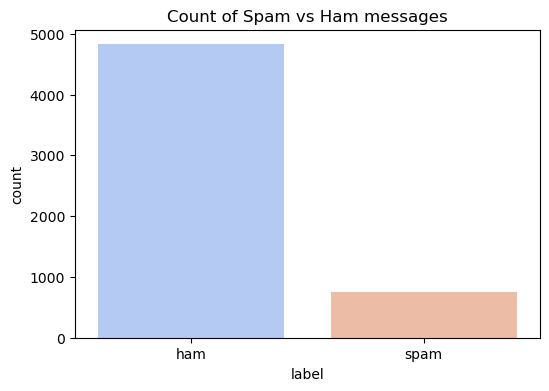

In [33]:
plt.figure(figsize=(6,4))
sns.countplot(x="label", data=df, palette="coolwarm")
plt.title("Count of Spam vs Ham messages")
plt.show()

In [11]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)              # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = text.strip()
    return text

df['message'] = df['message'].apply(clean_text)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

In [15]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [17]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
nb_pred = nb.predict(X_test_tfidf)

# Logistic Regression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train_tfidf, y_train)
lr_pred = lr.predict(X_test_tfidf)

# Support Vector Machine
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)
svm_pred = svm.predict(X_test_tfidf)

In [18]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

Naive Bayes Accuracy: 0.9695067264573991
Logistic Regression Accuracy: 0.9551569506726457
SVM Accuracy: 0.9802690582959641


In [20]:
print("\nClassification Report (SVM):\n", classification_report(y_test, svm_pred))
print("\nClassification Report (Naive Bayes):\n", classification_report(y_test, nb_pred))
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, lr_pred))


Classification Report (SVM):
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.97      0.88      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Classification Report (Naive Bayes):
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115


Classification Report (Logistic Regression):
               precision    recall  f1-score   support

         ham       0.95      1.00      0.97       965
        spam       0.98      0.68      0.80       150

    accuracy                           0.96      1115
   macro av

In [24]:
custom_msgs = [
    "Congratulations! You have won a free ticket to Bahamas. Call now!",
    "Hey, are we still meeting for lunch tomorrow?",
    "Claim your $1000 Walmart gift card now!!!",
    "Can you send me the project files tonight?"
]

In [28]:
custom_tfidf = tfidf.transform(custom_msgs)
print("\nCustom Predictions (SVM):", svm.predict(custom_tfidf))


Custom Predictions (SVM): ['spam' 'ham' 'spam' 'ham']
